# Experiement 1 - 5 Agents per Environment

In [58]:
import copy
import random
from control.GAAgent import GAAgent
from control.NNAgent import NNAgent
from control.astarAgent import AStarAgent
from control.rulebasedAgent import RBAgent
from model.model import Model
from timeit import default_timer as timer

MAPS = 10
AGENTS = 5
ORDER_SIZE = 100
UNIT_TIME = 1200

controls = [RBAgent(), AStarAgent(), NNAgent(), GAAgent()]

# real time, step time, order achieved, order given
RBScore1 = [0, 0, 0, 0, 0]
ASScore1 = [0, 0, 0, 0, 0]
NNScore1 = [0, 0, 0, 0, 0]
GAScore1 = [0, 0, 0, 0, 0]

scores = [RBScore1, ASScore1, NNScore1, GAScore1]

for map in range(MAPS):
    control_id = 0
    # generate view
    model_map = Model((random.randint(15,20), random.randint(15,20)), AGENTS, ORDER_SIZE)
    for control in controls:
        # generate view
        model = copy.deepcopy(model_map)

        control.initialise(model)

        start = timer()
        while model.timeStep < UNIT_TIME:
            control.moveAgents()
            if all(agent.orderItem is None for agent in model.agents):
                break
        end = timer()

        ### Print out results ###

        print(f"Total Real Time Taken: {end - start}")

        print(f"Total Time Unit: {model.timeStep}")

        deadAgentNum = 0
        for agent in model.agents:
            if agent.energy == 0:
                deadAgentNum += 1

        print(f"Total Dead agents: {deadAgentNum}")

        orderDone = ORDER_SIZE-len(model.order_list)
        orderPercent = (orderDone/ORDER_SIZE)*100
        print(f"Total Orders dropped off: {orderDone}/{ORDER_SIZE}")
        print(f"                           {orderPercent:.2f}%")

        scores[control_id][0] += (end - start)
        scores[control_id][1] += model.timeStep
        scores[control_id][2] += orderDone
        scores[control_id][3] += ORDER_SIZE
        scores[control_id][4] += deadAgentNum

        control_id = (control_id + 1) % 5

Total Real Time Taken: 1.6117772000143304
Total Time Unit: 1200
Total Dead agents: 0
Total Orders dropped off: 96/100
                           96.00%
Total Real Time Taken: 31.787849200016353
Total Time Unit: 1130
Total Dead agents: 0
Total Orders dropped off: 100/100
                           100.00%
Total Real Time Taken: 5.83447729999898
Total Time Unit: 382
Total Dead agents: 5
Total Orders dropped off: 0/100
                           0.00%
Total Real Time Taken: 5.599058599967975
Total Time Unit: 1200
Total Dead agents: 4
Total Orders dropped off: 1/100
                           1.00%
Total Real Time Taken: 1.0812554000294767
Total Time Unit: 1152
Total Dead agents: 0
Total Orders dropped off: 100/100
                           100.00%
Total Real Time Taken: 15.20191479998175
Total Time Unit: 968
Total Dead agents: 0
Total Orders dropped off: 100/100
                           100.00%
Total Real Time Taken: 3.7353765000007115
Total Time Unit: 256
Total Dead agents: 5
Total Or

In [59]:
# real time, step time, order achieved, order given, dead agents
# RB
print("Rule based results")
print(RBScore1)
RBScore_avg1 = [x / 10 for x in RBScore1]
print(RBScore_avg1)

# AS
print("A* results")
print(ASScore1)
ASScore_avg1 = [x / 10 for x in ASScore1]
print(ASScore_avg1)

# NN
print("Neural Network results")
print(NNScore1)
NNScore_avg1 = [x / 10 for x in NNScore1]
print(NNScore_avg1)

# GA
print("Genetic Algorithm results")
print(GAScore1)
GAScore_avg1 = [x / 10 for x in GAScore1]
print(GAScore_avg1)

Rule based results
[12.712866500078235, 11797, 976, 1000, 0]
[1.2712866500078235, 1179.7, 97.6, 100.0, 0.0]
A* results
[253.6395338999573, 10728, 1000, 1000, 1]
[25.363953389995732, 1072.8, 100.0, 100.0, 0.1]
Neural Network results
[46.16406920005102, 3018, 1, 1000, 50]
[4.616406920005102, 301.8, 0.1, 100.0, 5.0]
Genetic Algorithm results
[60.852711100073066, 12000, 27, 1000, 23]
[6.085271110007307, 1200.0, 2.7, 100.0, 2.3]


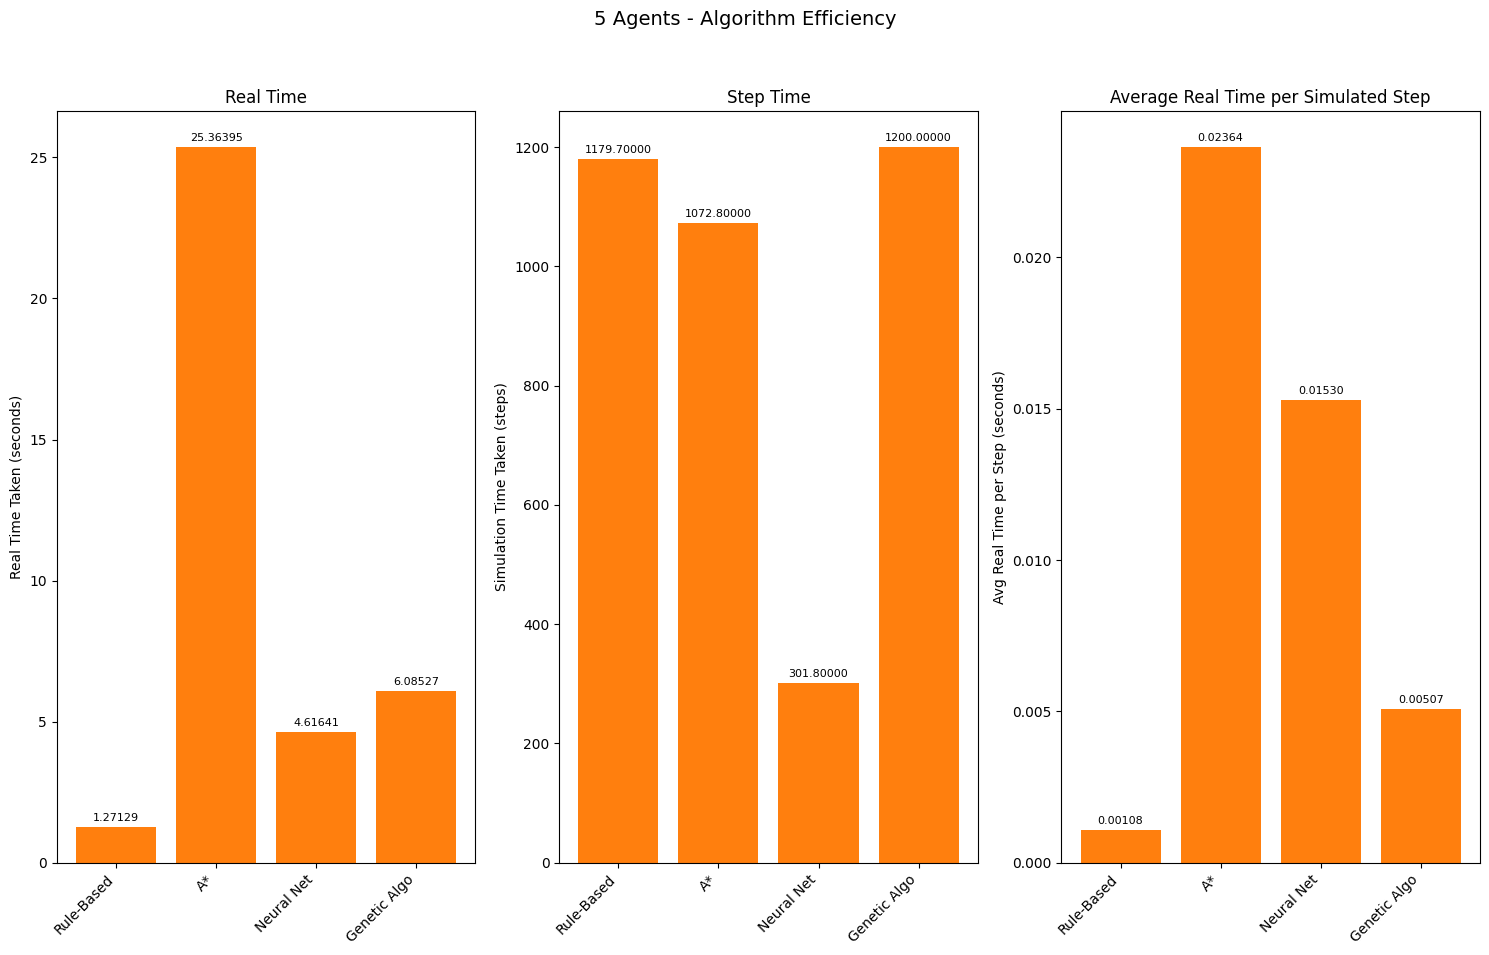

In [61]:
# Algorithm Efficiency
import matplotlib.pyplot as plt
import numpy as np

RB_eff_1 = RBScore_avg1[0:2] + [RBScore_avg1[0]/RBScore_avg1[1]]
AS_eff_1 = ASScore_avg1[0:2] + [ASScore_avg1[0]/ASScore_avg1[1]]
NN_eff_1 = NNScore_avg1[0:2] + [NNScore_avg1[0]/NNScore_avg1[1]]
GA_eff_1 = GAScore_avg1[0:2] + [GAScore_avg1[0]/GAScore_avg1[1]]

methods = ['Rule-Based', 'A*', 'Neural Net', 'Genetic Algo']
metrics = ['Real Time', 'Step Time', 'Average Real Time per Simulated Step']
data = np.array([RB_eff_1, AS_eff_1, NN_eff_1, GA_eff_1])
data = data.T

# plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
for i, ax in enumerate(axes):
    bars = ax.bar(np.arange(len(methods)), data[i])
    ax.bar(methods, data[i])
    ax.set_title(metrics[i])
    match i:
        case 0:
            ax.set_ylabel('Real Time Taken (seconds)')
        case 1:
            ax.set_ylabel('Simulation Time Taken (steps)')
        case _:
            ax.set_ylabel('Avg Real Time per Step (seconds)')
    ax.set_xticks(np.arange(len(methods)))
    ax.set_xticklabels(methods, rotation=45, ha='right')
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.5f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

fig.suptitle('5 Agents - Algorithm Efficiency', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Experiement 2 - 10 Agents per Environment

In [62]:
import copy
import random
from control.GAAgent import GAAgent
from control.NNAgent import NNAgent
from control.astarAgent import AStarAgent
from control.rulebasedAgent import RBAgent
from model.model import Model
from timeit import default_timer as timer

MAPS = 10
AGENTS = 10
ORDER_SIZE = 100
UNIT_TIME = 1200

controls = [RBAgent(), AStarAgent(), NNAgent(), GAAgent()]

# real time, step time, order achieved, order given
RBScore2 = [0, 0, 0, 0, 0]
ASScore2 = [0, 0, 0, 0, 0]
NNScore2 = [0, 0, 0, 0, 0]
GAScore2 = [0, 0, 0, 0, 0]

scores = [RBScore2, ASScore2, NNScore2, GAScore2]

for map in range(MAPS):
    control_id = 0
    # generate view
    model_map = Model((random.randint(15,20), random.randint(15,20)), AGENTS, ORDER_SIZE)
    for control in controls:
        # generate view
        model = copy.deepcopy(model_map)

        control.initialise(model)

        start = timer()
        while model.timeStep < UNIT_TIME:
            control.moveAgents()
            if all(agent.orderItem is None for agent in model.agents):
                break
        end = timer()

        ### Print out results ###

        print(f"Total Real Time Taken: {end - start}")

        print(f"Total Time Unit: {model.timeStep}")

        deadAgentNum = 0
        for agent in model.agents:
            if agent.energy == 0:
                deadAgentNum += 1

        print(f"Total Dead agents: {deadAgentNum}")

        orderDone = ORDER_SIZE-len(model.order_list)
        orderPercent = (orderDone/ORDER_SIZE)*100
        print(f"Total Orders dropped off: {orderDone}/{ORDER_SIZE}")
        print(f"                           {orderPercent:.2f}%")

        scores[control_id][0] += (end - start)
        scores[control_id][1] += model.timeStep
        scores[control_id][2] += orderDone
        scores[control_id][3] += ORDER_SIZE
        scores[control_id][4] += deadAgentNum

        control_id = (control_id + 1) % 5

Total Real Time Taken: 1.6685638999915682
Total Time Unit: 621
Total Dead agents: 0
Total Orders dropped off: 100/100
                           100.00%
Total Real Time Taken: 41.13316789997043
Total Time Unit: 569
Total Dead agents: 0
Total Orders dropped off: 100/100
                           100.00%
Total Real Time Taken: 12.392948300053831
Total Time Unit: 400
Total Dead agents: 10
Total Orders dropped off: 0/100
                           0.00%
Total Real Time Taken: 14.915917099977378
Total Time Unit: 1200
Total Dead agents: 2
Total Orders dropped off: 8/100
                           8.00%
Total Real Time Taken: 1.716066499997396
Total Time Unit: 1200
Total Dead agents: 3
Total Orders dropped off: 100/100
                           100.00%
Total Real Time Taken: 22.929110300028697
Total Time Unit: 493
Total Dead agents: 0
Total Orders dropped off: 100/100
                           100.00%
Total Real Time Taken: 8.725520399981178
Total Time Unit: 304
Total Dead agents: 10
Total

In [67]:
# real time, step time, order achieved, order given, dead agents
# RB
print("Rule based results")
print(RBScore2)
RBScore_avg2 = [x / 10 for x in RBScore2]
print(RBScore_avg2)

# AS
print("A* results")
print(ASScore2)
ASScore_avg2 = [x / 10 for x in ASScore2]
print(ASScore_avg2)

# NN
print("Neural Network results")
print(NNScore2)
NNScore_avg2 = [x / 10 for x in NNScore2]
print(NNScore_avg2)

# GA
print("Genetic Algorithm results")
print(GAScore2)
GAScore_avg2 = [x / 10 for x in GAScore2]
print(GAScore_avg2)

Rule based results
[13.7057000999921, 6708, 1000, 1000, 3]
[1.37057000999921, 670.8, 100.0, 100.0, 0.3]
A* results
[315.8552608001046, 5805, 1000, 1000, 1]
[31.58552608001046, 580.5, 100.0, 100.0, 0.1]
Neural Network results
[92.4773965999484, 3166, 7, 1000, 100]
[9.24773965999484, 316.6, 0.7, 100.0, 10.0]
Genetic Algorithm results
[133.25713340000948, 12000, 74, 1000, 26]
[13.325713340000949, 1200.0, 7.4, 100.0, 2.6]


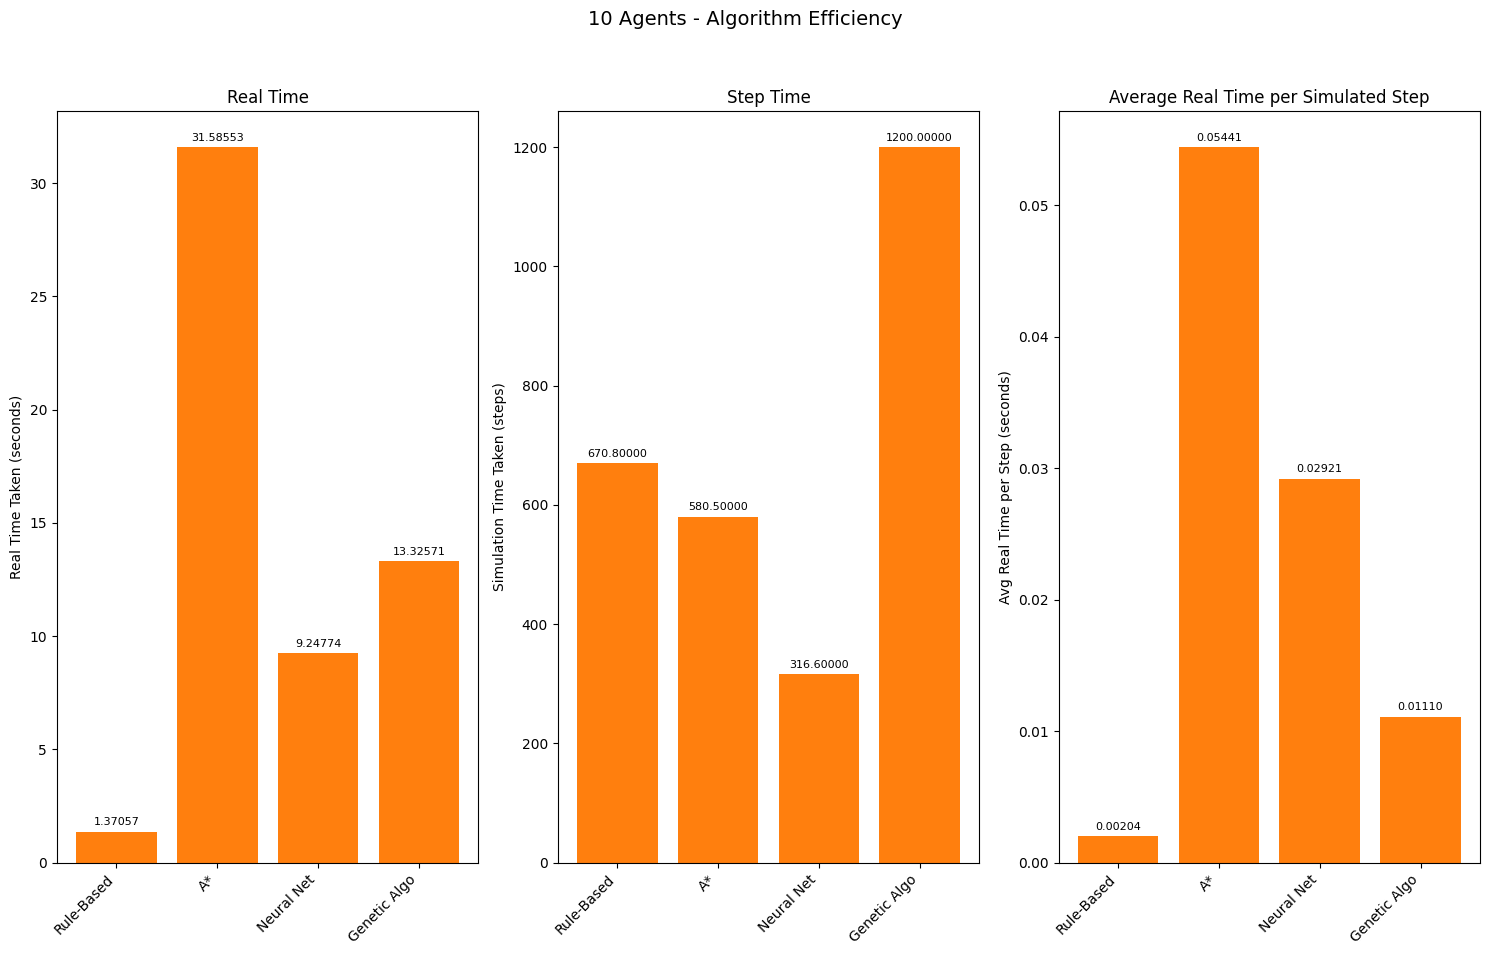

In [68]:
# Algorithm Efficiency
import matplotlib.pyplot as plt
import numpy as np

RB_eff_2 = RBScore_avg2[0:2] + [RBScore_avg2[0]/RBScore_avg2[1]]
AS_eff_2 = ASScore_avg2[0:2] + [ASScore_avg2[0]/ASScore_avg2[1]]
NN_eff_2 = NNScore_avg2[0:2] + [NNScore_avg2[0]/NNScore_avg2[1]]
GA_eff_2 = GAScore_avg2[0:2] + [GAScore_avg2[0]/GAScore_avg2[1]]

methods = ['Rule-Based', 'A*', 'Neural Net', 'Genetic Algo']
metrics = ['Real Time', 'Step Time', 'Average Real Time per Simulated Step']
data = np.array([RB_eff_2, AS_eff_2, NN_eff_2, GA_eff_2])
data = data.T

# plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
for i, ax in enumerate(axes):
    bars = ax.bar(np.arange(len(methods)), data[i])
    ax.bar(methods, data[i])
    ax.set_title(metrics[i])
    match i:
        case 0:
            ax.set_ylabel('Real Time Taken (seconds)')
        case 1:
            ax.set_ylabel('Simulation Time Taken (steps)')
        case _:
            ax.set_ylabel('Avg Real Time per Step (seconds)')
    ax.set_xticks(np.arange(len(methods)))
    ax.set_xticklabels(methods, rotation=45, ha='right')
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.5f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

fig.suptitle('10 Agents - Algorithm Efficiency', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Experiement 3 - 20 Agents per Environment

In [65]:
import copy
import random
from control.GAAgent import GAAgent
from control.NNAgent import NNAgent
from control.astarAgent import AStarAgent
from control.rulebasedAgent import RBAgent
from model.model import Model
from timeit import default_timer as timer

MAPS = 10
AGENTS = 20
ORDER_SIZE = 100
UNIT_TIME = 1200

controls = [RBAgent(), AStarAgent(), NNAgent(), GAAgent()]

# real time, step time, order achieved, order given
RBScore3 = [0, 0, 0, 0, 0]
ASScore3 = [0, 0, 0, 0, 0]
NNScore3 = [0, 0, 0, 0, 0]
GAScore3 = [0, 0, 0, 0, 0]

scores = [RBScore3, ASScore3, NNScore3, GAScore3]

for map in range(MAPS):
    control_id = 0
    # generate view
    model_map = Model((random.randint(15,20), random.randint(15,20)), AGENTS, ORDER_SIZE)
    for control in controls:
        # generate view
        model = copy.deepcopy(model_map)

        control.initialise(model)

        start = timer()
        while model.timeStep < UNIT_TIME:
            control.moveAgents()
            if all(agent.orderItem is None for agent in model.agents):
                break
        end = timer()

        ### Print out results ###

        print(f"Total Real Time Taken: {end - start}")

        print(f"Total Time Unit: {model.timeStep}")

        deadAgentNum = 0
        for agent in model.agents:
            if agent.energy == 0:
                deadAgentNum += 1

        print(f"Total Dead agents: {deadAgentNum}")

        orderDone = ORDER_SIZE-len(model.order_list)
        orderPercent = (orderDone/ORDER_SIZE)*100
        print(f"Total Orders dropped off: {orderDone}/{ORDER_SIZE}")
        print(f"                           {orderPercent:.2f}%")

        scores[control_id][0] += (end - start)
        scores[control_id][1] += model.timeStep
        scores[control_id][2] += orderDone
        scores[control_id][3] += ORDER_SIZE
        scores[control_id][4] += deadAgentNum

        control_id = (control_id + 1) % 5

Total Real Time Taken: 1.3644290000083856
Total Time Unit: 552
Total Dead agents: 1
Total Orders dropped off: 100/100
                           100.00%
Total Real Time Taken: 45.91924319998361
Total Time Unit: 515
Total Dead agents: 4
Total Orders dropped off: 100/100
                           100.00%
Total Real Time Taken: 12.012861699971836
Total Time Unit: 288
Total Dead agents: 15
Total Orders dropped off: 1/100
                           1.00%
Total Real Time Taken: 23.170306999993045
Total Time Unit: 1200
Total Dead agents: 0
Total Orders dropped off: 15/100
                           15.00%
Total Real Time Taken: 2.0060694999992847
Total Time Unit: 459
Total Dead agents: 1
Total Orders dropped off: 100/100
                           100.00%
Total Real Time Taken: 77.91390240000328
Total Time Unit: 468
Total Dead agents: 2
Total Orders dropped off: 100/100
                           100.00%
Total Real Time Taken: 18.54474449995905
Total Time Unit: 362
Total Dead agents: 18
Tota

In [71]:
# real time, step time, order achieved, order given, dead agents
# RB
print("Rule based results")
print(RBScore3)
RBScore_avg3 = [x / 10 for x in RBScore3]
print(RBScore_avg3)

# AS
print("A* results")
print(ASScore3)
ASScore_avg3 = [x / 10 for x in ASScore3]
print(ASScore_avg3)

# NN
print("Neural Network results")
print(NNScore3)
NNScore_avg3 = [x / 10 for x in NNScore3]
print(NNScore_avg3)

# GA
print("Genetic Algorithm results")
print(GAScore3)
GAScore_avg3 = [x / 10 for x in GAScore3]
print(GAScore_avg3)

Rule based results
[14.85009830002673, 4965, 1000, 1000, 2]
[1.485009830002673, 496.5, 100.0, 100.0, 0.2]
A* results
[635.9134269999922, 6884, 1000, 1000, 25]
[63.591342699999224, 688.4, 100.0, 100.0, 2.5]
Neural Network results
[142.85378019989002, 2940, 15, 1000, 166]
[14.285378019989002, 294.0, 1.5, 100.0, 16.6]
Genetic Algorithm results
[276.9211861000513, 12000, 166, 1000, 0]
[27.692118610005128, 1200.0, 16.6, 100.0, 0.0]


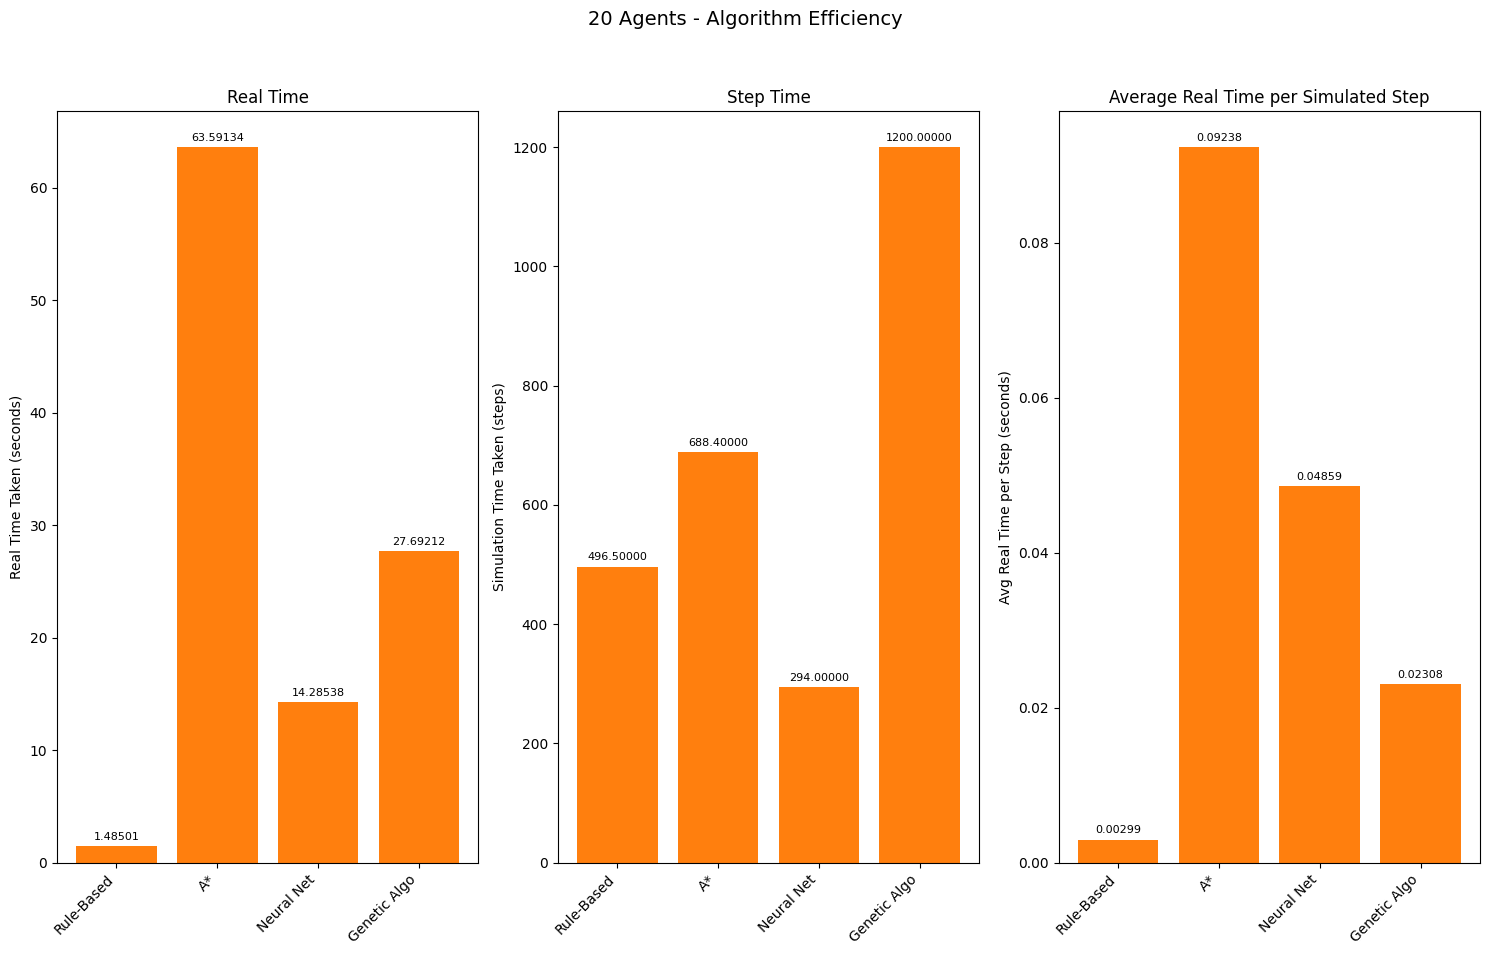

In [72]:
# Algorithm Efficiency
import matplotlib.pyplot as plt
import numpy as np

RB_eff_3 = RBScore_avg3[0:2] + [RBScore_avg3[0]/RBScore_avg3[1]]
AS_eff_3 = ASScore_avg3[0:2] + [ASScore_avg3[0]/ASScore_avg3[1]]
NN_eff_3 = NNScore_avg3[0:2] + [NNScore_avg3[0]/NNScore_avg3[1]]
GA_eff_3 = GAScore_avg3[0:2] + [GAScore_avg3[0]/GAScore_avg3[1]]

methods = ['Rule-Based', 'A*', 'Neural Net', 'Genetic Algo']
metrics = ['Real Time', 'Step Time', 'Average Real Time per Simulated Step']
data = np.array([RB_eff_3, AS_eff_3, NN_eff_3, GA_eff_3])
data = data.T

# plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
for i, ax in enumerate(axes):
    bars = ax.bar(np.arange(len(methods)), data[i])
    ax.bar(methods, data[i])
    ax.set_title(metrics[i])
    match i:
        case 0:
            ax.set_ylabel('Real Time Taken (seconds)')
        case 1:
            ax.set_ylabel('Simulation Time Taken (steps)')
        case _:
            ax.set_ylabel('Avg Real Time per Step (seconds)')
    ax.set_xticks(np.arange(len(methods)))
    ax.set_xticklabels(methods, rotation=45, ha='right')
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.5f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

fig.suptitle('20 Agents - Algorithm Efficiency', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

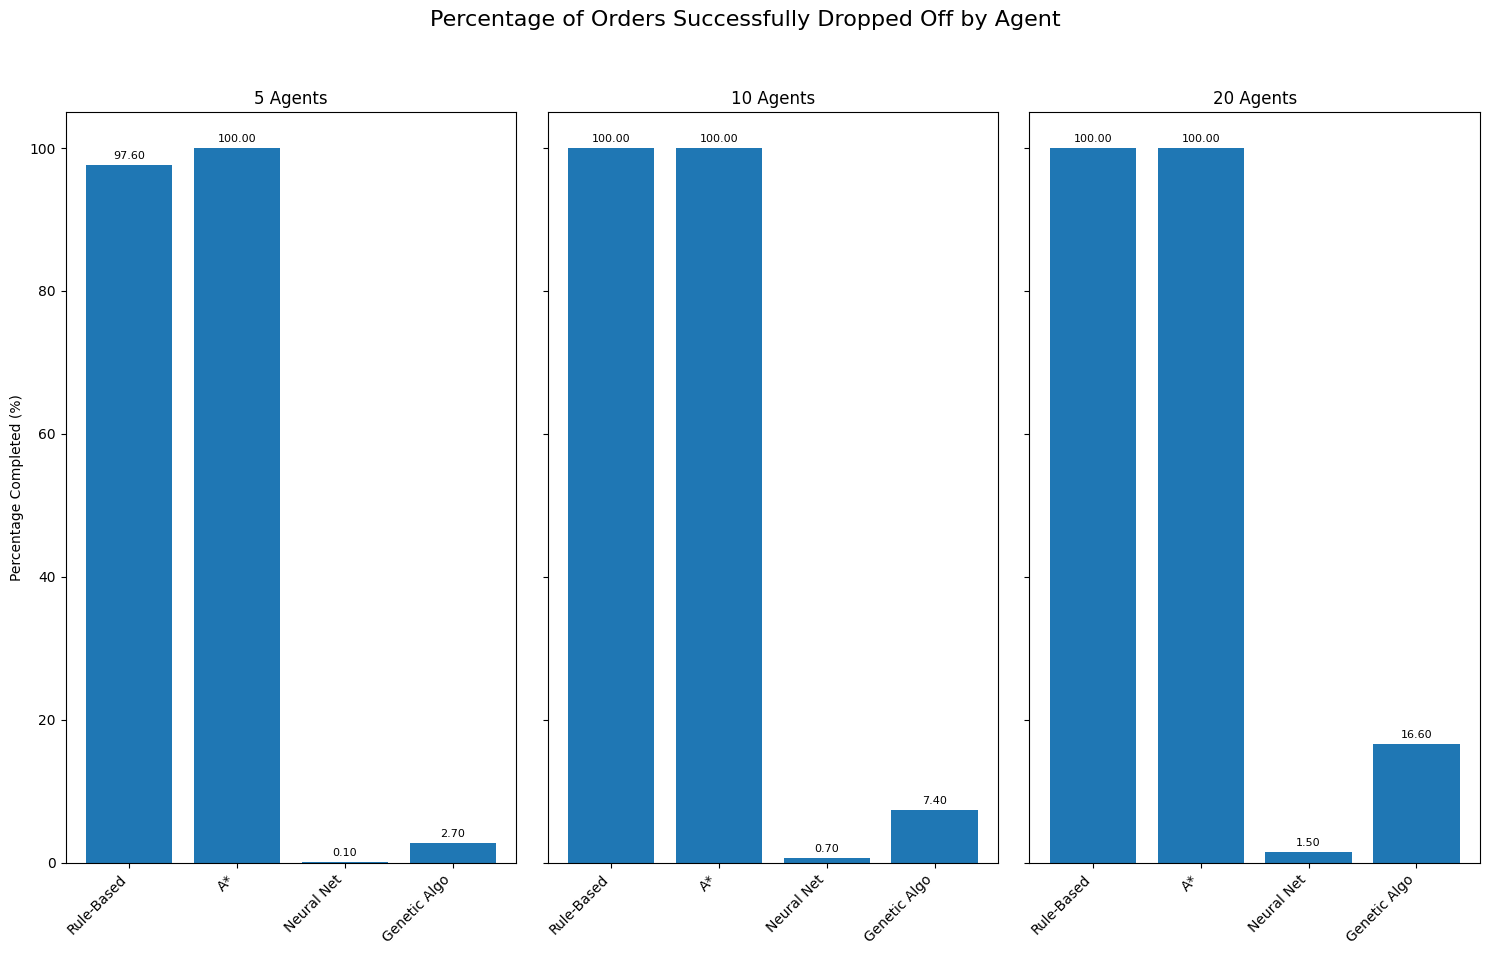

In [80]:
# Order Completion
import matplotlib.pyplot as plt
import numpy as np
# 5 agents
RB_ord_1 = [(RBScore_avg1[2]/RBScore_avg1[3])*100]
AS_ord_1 = [(ASScore_avg1[2]/ASScore_avg1[3])*100]
NN_ord_1 = [(NNScore_avg1[2]/NNScore_avg1[3])*100]
GA_ord_1 = [(GAScore_avg1[2]/GAScore_avg1[3])*100]
# 10 agents
RB_ord_2 = [(RBScore_avg2[2]/RBScore_avg2[3])*100]
AS_ord_2 = [(ASScore_avg2[2]/ASScore_avg2[3])*100]
NN_ord_2 = [(NNScore_avg2[2]/NNScore_avg2[3])*100]
GA_ord_2 = [(GAScore_avg2[2]/GAScore_avg2[3])*100]
# 20 agents
RB_ord_3 = [(RBScore_avg3[2]/RBScore_avg3[3])*100]
AS_ord_3 = [(ASScore_avg3[2]/ASScore_avg3[3])*100]
NN_ord_3 = [(NNScore_avg3[2]/NNScore_avg3[3])*100]
GA_ord_3 = [(GAScore_avg3[2]/GAScore_avg3[3])*100]

methods = ['Rule-Based', 'A*', 'Neural Net', 'Genetic Algo']
data = np.array([
    [RB_ord_1[0], AS_ord_1[0], NN_ord_1[0], GA_ord_1[0]],
    [RB_ord_2[0], AS_ord_2[0], NN_ord_2[0], GA_ord_2[0]],
    [RB_ord_3[0], AS_ord_3[0], NN_ord_3[0], GA_ord_3[0]]
])

titles = ['5 Agents', '10 Agents', '20 Agents']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)

for i, ax in enumerate(axes):
    bars = ax.bar(np.arange(len(methods)), data[i])
    ax.set_title(titles[i])
    ax.set_ylabel('Percentage Completed (%)' if i == 0 else '')
    ax.set_xticks(np.arange(len(methods)))
    ax.set_xticklabels(methods, rotation=45, ha='right')

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

fig.suptitle('Percentage of Orders Successfully Dropped Off by Agent', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

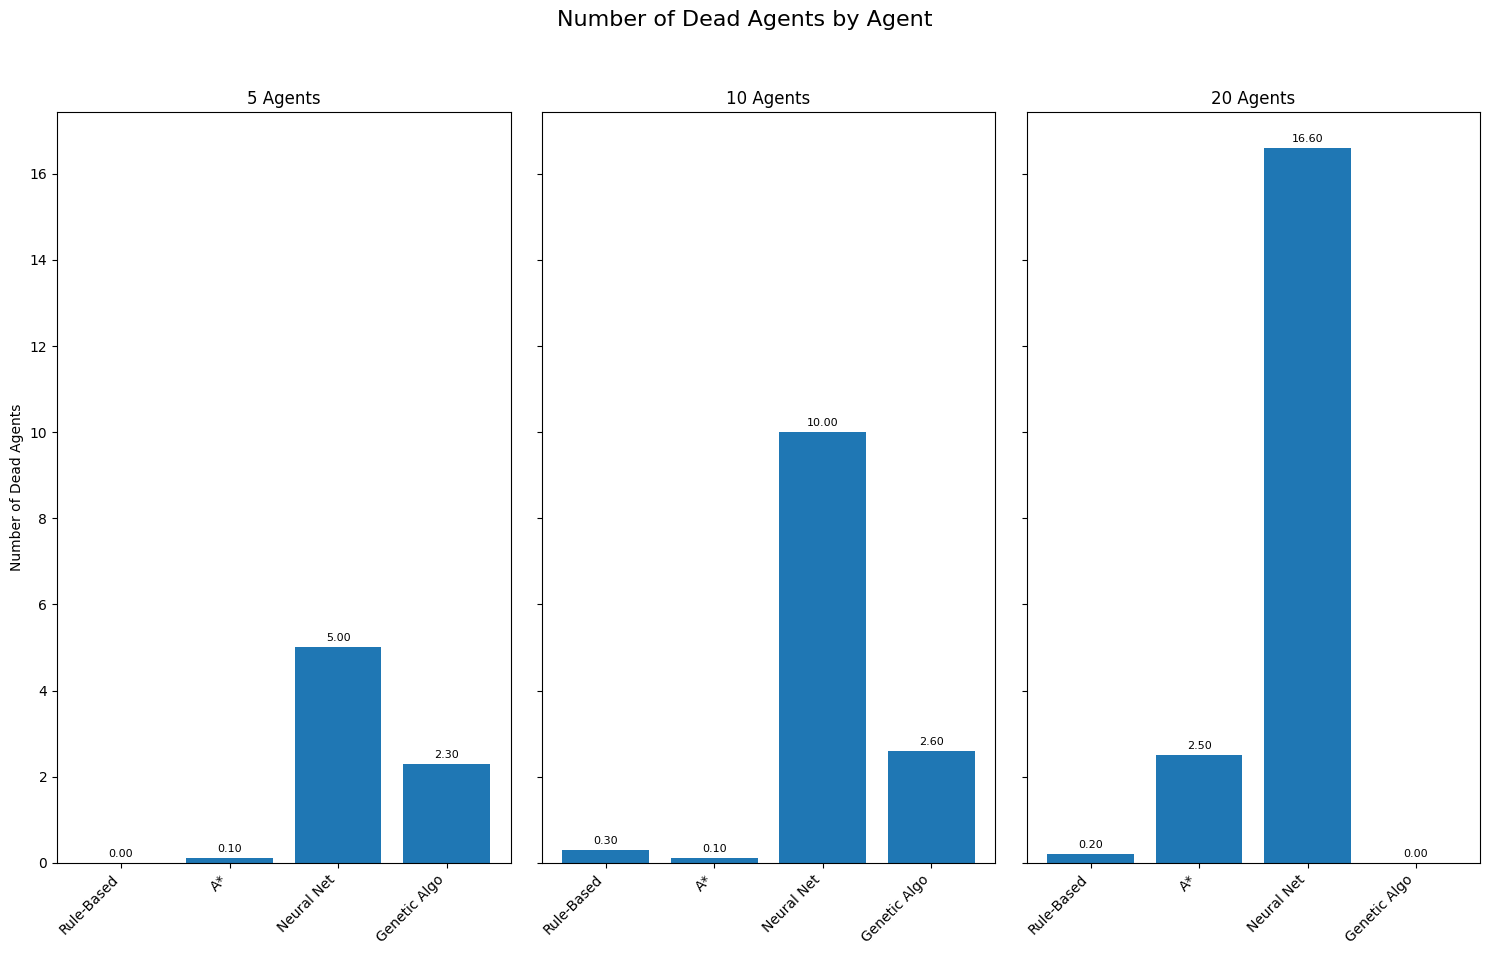

In [81]:
# ORder Completion
import matplotlib.pyplot as plt
import numpy as np
# real time, step time, order achieved, order given, dead agents
RB_dead_1 = [RBScore_avg1[4]]
AS_dead_1 = [ASScore_avg1[4]]
NN_dead_1 = [NNScore_avg1[4]]
GA_dead_1 = [GAScore_avg1[4]]

RB_dead_2 = [RBScore_avg2[4]]
AS_dead_2 = [ASScore_avg2[4]]
NN_dead_2 = [NNScore_avg2[4]]
GA_dead_2 = [GAScore_avg2[4]]

RB_dead_3 = [RBScore_avg3[4]]
AS_dead_3 = [ASScore_avg3[4]]
NN_dead_3 = [NNScore_avg3[4]]
GA_dead_3 = [GAScore_avg3[4]]

methods = ['Rule-Based', 'A*', 'Neural Net', 'Genetic Algo']
data = np.array([
    [RB_dead_1[0], AS_dead_1[0], NN_dead_1[0], GA_dead_1[0]],
    [RB_dead_2[0], AS_dead_2[0], NN_dead_2[0], GA_dead_2[0]],
    [RB_dead_3[0], AS_dead_3[0], NN_dead_3[0], GA_dead_3[0]]
])

titles = ['5 Agents', '10 Agents', '20 Agents']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)

for i, ax in enumerate(axes):
    bars = ax.bar(np.arange(len(methods)), data[i])
    ax.set_title(titles[i])
    ax.set_ylabel('Number of Dead Agents' if i == 0 else '')
    ax.set_xticks(np.arange(len(methods)))
    ax.set_xticklabels(methods, rotation=45, ha='right')

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

fig.suptitle('Number of Dead Agents by Agent', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()